# NLTK

NLTK is a large collection of NLP tools.We won't have time to cover everything, so we'll focus on the most common tools:

[Existing corpora](#existing)<br>

[Tokenization](#tokenization)<br>

[Sentence segmentation](#sent-seg)<br>

[Collocations](#collocations)<br>

[Sentiment analysis](#sentiment)<br>

[Stemming](#stemming)<br>

[What we didn't cover](#didnt)<br>

### Time
- Teaching: 30 minutes
- Exercises: 30 minutes

In [1]:
%matplotlib inline
import os
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Existing corpora <a id='existing'></a>

When you downloaded data from nltk using `nltk.download('all')`, you downloaded a whole bunch of great corpora (collections of text documents) and lexical resources (structured information about words). This gives us data to work with already! If you ever want to learn/practice an NLP method, know that just by importing nltk you have access to some data. Here are some corpora and resources that are particularly useful and that we'll use throughout this workshop:

- ABC
- Brown
- CMU pronunciation dictionary
- Genesis
- Project Gutenberg selections
- Inaugural addresses
- Movie reviews
- Names
- State of the Union addresses
- Stopwords
- Twitter samples
- Universal Declaration of Human Rights
- WordNet

Full list of data in NLTK [here](http://www.nltk.org/nltk_data/).

In [2]:
from nltk.corpus import (abc, brown, cmudict, genesis, gutenberg,
                         inaugural, movie_reviews, names, state_union, 
                         stopwords, swadesh, twitter_samples, udhr2, 
                         wordnet)

Corpora in NLTK are special objects in NLTK that give you the exact data you want only when you ask for it. For example, `brown` is not a string or a list of words.

In [3]:
brown

<CategorizedTaggedCorpusReader in '/Users/bacon/nltk_data/corpora/brown'>

#### Words, raw, sents, fileids

But if I wanted the Brown corpus as a list of words, I could ask for it like this:

In [4]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

Similarly, if I wanted the text of the ABC corpus as a string, I could get it like this:

In [5]:
abc.raw()[:100]

'PM denies knowledge of AWB kickbacks\nThe Prime Minister has denied he knew AWB was paying kickbacks '

If you wanted the sentences of a corpus, you can ask for them like this:

In [6]:
movie_reviews.sents()

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ...]

These corpora are often made up of multiple files. You can see the file names by using the `fileids` method.

In [7]:
names.fileids()

['female.txt', 'male.txt']

To restrict the words, raw or sents to just the words/raw/sents in a particular file, you can list the file name as an optional argument to the `words`/`raw`/`sents` method.

In [8]:
male_names = names.words('male.txt')
male_names[:10]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim']

#### Unique properties

Some corpora have unique aspects to them. For example, the CMU pronunciation dictionary lists (some standard) pronunciation of English words.

In [9]:
pronunciation = cmudict.dict()

In [10]:
pronunciation['hello']

[['HH', 'AH0', 'L', 'OW1'], ['HH', 'EH0', 'L', 'OW1']]

### Male vs. female names

In [11]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

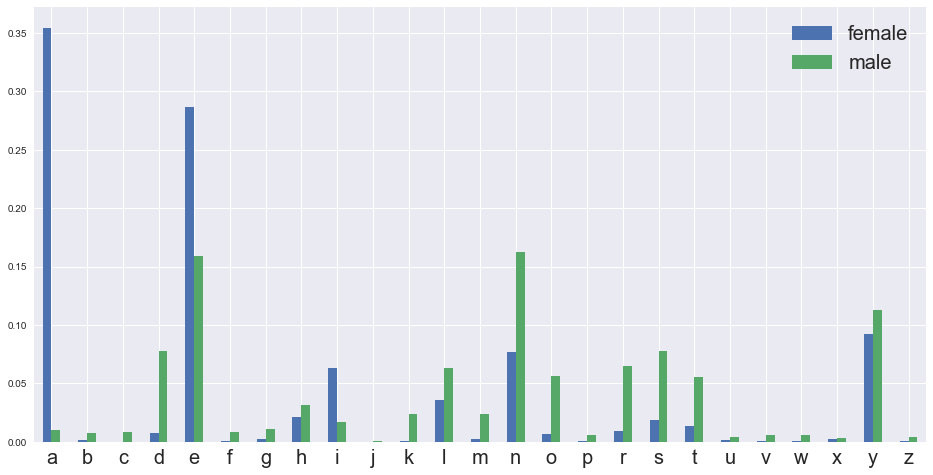

In [12]:
def last_letter(name):
    """Returns the last letter of `name`."""
    return name.strip()[-1]

def count_letters(names):
    """Returns the distribution of the last letters in `names`."""
    return pd.Series([last_letter(n) for n in names]).value_counts(normalize=True)

def letter_distribution():
    male_value_counts = count_letters(male_names)
    female_value_counts = count_letters(female_names)
    return pd.DataFrame.from_dict({'male': male_value_counts, 'female': female_value_counts})

df = letter_distribution()
df.plot(kind='bar', figsize=(16, 8))
plt.legend(prop={'size': 20})
plt.xticks(rotation=0, size=20);

### Challenge

- Count the lengths of the sentences (i.e. the number of words per sentence) in the `inaugural` corpus. Find the minimum, average and maximum sentence length.
- Visualize the distribution of lengths.
- Count the number of times the following words appear in the corpus: "america", "citizen", "united", "senate" and "freedom".
- If you are surprised by anything in the answer to the last question, think about capitalization issues. Make all words lowercase and then perform your counts.

In [13]:
# solution
lengths = [len(s) for s in inaugural.sents()]
min_length = min(lengths)
mean_length = sum(lengths) / len(lengths)
max_length = max(lengths)
print(min_length, mean_length, max_length)

2 29.9373459326212 810


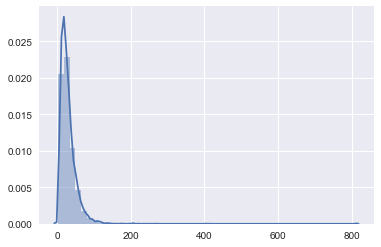

In [14]:
# solution
sns.distplot(lengths);

In [15]:
for word in ["america", "citizen", "united", "senate", "freedom"]:
    n = inaugural.words().count(word)
    print(word, ':', n)

america : 0
citizen : 54
united : 32
senate : 4
freedom : 174


In [16]:
inaugural_words = [w.lower() for w in inaugural.words()]
for word in ["america", "citizen", "united", "senate", "freedom"]:
    n = inaugural_words.count(word)
    print(word, ':', n)

america : 192
citizen : 54
united : 197
senate : 15
freedom : 183


## Tokenization <a id='tokenization'></a>

More often than not, you'll want to analyze some text that doesn't come from NLTK. Perhaps you've scraped a few websites and stored the text in a text file. One of the first steps in processing your text data is tokenization. **Tokenization refers to breaking a running string of text into individual words.**

I've download the text contents of the Wikipedia page on [Python][1], and saved it in the `data` directory. We can read it in as follows:

[1]: https://en.wikipedia.org/wiki/Python_(programming_language)

In [17]:
DATA_DIR = '../data'
python_wiki_fname = os.path.join(DATA_DIR, 'python_wikipedia.txt')
with open(python_wiki_fname) as f:
    text = f.read()

Now, `text` is a string:

In [18]:
text[:100]

'Python is an interpreted high-level programming language for general-purpose programming. Created by'

We can tokenize this string by using nltk's `word_tokenize` function, which returns a list of strings. Each string is either a word or a punctuation symbol.

In [19]:
tokens = nltk.word_tokenize(text)
tokens[:10]

['Python',
 'is',
 'an',
 'interpreted',
 'high-level',
 'programming',
 'language',
 'for',
 'general-purpose',
 'programming']

This uses NLTK's recommended tokenizer. There are plenty of [other tokenizers in NLTK](https://github.com/nltk/nltk/tree/develop/nltk/tokenize), but unless you have good reason to do otherwise it's best to stick to the recommended tokenizer.

### Challenge

I've also downloaded the Wikipedia page for [Berkeley, California][2], and saved the contents as a file called 'berkeley_wikipedia.txt'. Borrowing from the code above, read this file in and tokenize the text. Then find the 10 most frequenct "words". After that, if you don't like counting punctuation symbols as "words", then remove all punctuation symbols then find the 10 most frequenct words.

[2]: https://en.wikipedia.org/wiki/Berkeley,_California

In [20]:
# solution
berkeley_wiki_fname = os.path.join(DATA_DIR, 'berkeley_wikipedia.txt')
with open(python_wiki_fname) as f:
    text = f.read()

tokens = nltk.word_tokenize(text)
s = pd.Series(tokens)
s.value_counts().head(10)

,         406
.         318
the       212
Python    203
and       183
a         155
to        141
of        139
is        124
)         110
dtype: int64

In [21]:
from string import punctuation
no_punct = [t for t in tokens if t not in punctuation]
s = pd.Series(no_punct)
s.value_counts().head(10)

the       212
Python    203
and       183
a         155
to        141
of        139
is        124
in        109
as         66
for        65
dtype: int64

### Sentence segmentation <a id='sent-seg'></a>

Sentence segmentation refers to finding the beginnings and ends of sentences. It's also sometimes called sentence tokenization. Again, there are lots of ways in NLTK to do this, but they have conviently chosen a default method for us. The `nltk.sent_tokenize` function takes in a string and returns a list of strings, where each string is a sentence.

In [22]:
sents = nltk.sent_tokenize(text)
sents[:2]

['Python is an interpreted high-level programming language for general-purpose programming.',
 'Created by Guido van Rossum and first released in 1991, Python has a design philosophy that emphasizes code readability, notably using significant whitespace.']

### Collocations <a id='collocations'></a>

Collocations are words that frequently appear together. They can help us identify key phrases in a text. Collocations can be bigrams (two words), tri-grams (three) or 4-grams. In NLTK, we can use the `BigramCollocationFinder` to find all the bigram collocations in a text. First, we feed in the tokenized text. Here, we'll use the 'learned' portion of the Brown corpus.

In [23]:
tokens = brown.words(categories='learned')
collocations = nltk.BigramCollocationFinder.from_words(tokens)

Then we decide which words to filter out. I don't want words less than three characters or stopwords.

In [24]:
ignored_words = stopwords.words('english')
word_filter = lambda w: len(w) < 3 or w.lower() in ignored_words
collocations.apply_freq_filter(3)
collocations.apply_word_filter(word_filter)

Then we decide what method NLTK should use to decide what makes a collocation special. We'll use the likelihood ratio, which is a good standard choice.

In [25]:
scorer = nltk.collocations.BigramAssocMeasures.likelihood_ratio
collocations.nbest(scorer, 15)

[('United', 'States'),
 ('per', 'cent'),
 ('dominant', 'stress'),
 ('carbon', 'tetrachloride'),
 ('sweet', 'clover'),
 ('wage', 'rate'),
 ('anode', 'holder'),
 ('electronic', 'switches'),
 ('John', 'Brown'),
 ('minimal', 'polynomial'),
 ('index', 'words'),
 ('index', 'word'),
 ('radio', 'emission'),
 ('pulmonary', 'artery'),
 ('electronic', 'switch')]

This was kinda messy. We can wrap all this up into a nicer function that just takes in the tokens and spits out the collocations.

In [26]:
def my_collocations(tokens):
    collocations = nltk.BigramCollocationFinder.from_words(tokens)
    ignored_words = stopwords.words('english')
    word_filter = lambda w: len(w) < 3 or w.lower() in ignored_words
    collocations.apply_freq_filter(3)
    collocations.apply_word_filter(word_filter)
    scorer = nltk.collocations.BigramAssocMeasures.likelihood_ratio
    return collocations.nbest(scorer, 15)

And now run `my_collocations` on some new text.

In [27]:
my_collocations(state_union.words())

[('United', 'States'),
 ('fiscal', 'year'),
 ('Social', 'Security'),
 ('American', 'people'),
 ('United', 'Nations'),
 ('million', 'dollars'),
 ('health', 'care'),
 ('billion', 'dollars'),
 ('Middle', 'East'),
 ('years', 'ago'),
 ('Federal', 'Government'),
 ('Soviet', 'Union'),
 ('21st', 'century'),
 ('last', 'year'),
 ('JOINT', 'SESSION')]

In [28]:
emma = gutenberg.words('austen-emma.txt')
my_collocations(emma)

[('Frank', 'Churchill'),
 ('Miss', 'Woodhouse'),
 ('Miss', 'Bates'),
 ('Jane', 'Fairfax'),
 ('Miss', 'Fairfax'),
 ('every', 'thing'),
 ('young', 'man'),
 ('every', 'body'),
 ('great', 'deal'),
 ('dare', 'say'),
 ('John', 'Knightley'),
 ('Maple', 'Grove'),
 ('Miss', 'Smith'),
 ('Miss', 'Taylor'),
 ('Robert', 'Martin')]

In [29]:
my_collocations(genesis.words('english-kjv.txt'))

[('said', 'unto'),
 ('pray', 'thee'),
 ('thou', 'shalt'),
 ('thou', 'hast'),
 ('thy', 'seed'),
 ('years', 'old'),
 ('spake', 'unto'),
 ('thou', 'art'),
 ('LORD', 'God'),
 ('every', 'living'),
 ('God', 'hath'),
 ('begat', 'sons'),
 ('seven', 'years'),
 ('shalt', 'thou'),
 ('little', 'ones')]

### Sentiment analysis <a id='sentiment'></a>

NLTK has support for sentiment analysis. [Sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) is the task of extracting [affective states](https://en.wikipedia.org/wiki/Affect_(psychology)) from text. The VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. There was a [Python package](https://github.com/cjhutto/vaderSentiment) developed for it outside of NLTK, which was then incorporated into NLTK. Loading it through NLTK is often buggy, but we can install the original package if it fails through NLTK. It ends up working the same.

In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer
try:
    sentiment = SentimentIntensityAnalyzer()
except LookupError:
    print('Sentiment analysis in NLTK is not working at the moment :(')

Sentiment analysis in NLTK is not working at the moment :(


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


If the `SentimentIntensityAnalyzer` isn't loading properly from `nltk`, then you'll have to install the original package using the line below:

In [31]:
!pip install -U vaderSentiment

Requirement already up-to-date: vaderSentiment in /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages


And then import it like this:

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Whether you used NLTK's `SentimentIntensityAnalyzer` or gor it from `vaderSentiment`, the rest of the code is identical.

In [33]:
sentiment = SentimentIntensityAnalyzer()

Analyzing a sentence for its sentiment returns a dictionary with four items. The `compound` key holds the overall score.

In [34]:
sentence = "I hate this sentence so much. I just want it to end. It sucks!"
sentiment.polarity_scores(sentence)

{'compound': -0.6837, 'neg': 0.374, 'neu': 0.461, 'pos': 0.165}

In [35]:
sentences = ["VADER is smart, handsome, and funny.",      # positive sentence example
            "VADER is not smart, handsome, nor funny.",   # negation sentence example
            "VADER is smart, handsome, and funny!",       # punctuation emphasis handled correctly (sentiment intensity adjusted)
            "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
            "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
            "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
            "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!",# booster words & punctuation make this close to ceiling for score
            "The book was good.",                                     # positive sentence
            "The book was kind of good.",                 # qualified positive sentence is handled correctly (intensity adjusted)
            "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
            "At least it isn't a horrible book.",         # negated negative sentence with contraction
            "Make sure you :) or :D today!",              # emoticons handled
            "Today SUX!",                                 # negative slang with capitalization emphasis
            "Today only kinda sux! But I'll get by, lol"  # mixed sentiment example with slang and constrastive conjunction "but"
             ]

In [36]:
scores = []
for sent in sentences:
    score = sentiment.polarity_scores(sent)
    scores.append(score)
df = pd.DataFrame(scores)
df['sentence'] = sentences
df

,compound,neg,neu,pos,sentence
0,0.8316,0.000,0.254,0.746,"VADER is smart, handsome, and funny."
1,-0.7424,0.646,0.354,0.000,"VADER is not smart, handsome, nor funny."
2,0.8439,0.000,0.248,0.752,"VADER is smart, handsome, and funny!"
3,0.8545,0.000,0.299,0.701,"VADER is very smart, handsome, and funny."
4,0.9227,0.000,0.246,0.754,"VADER is VERY SMART, handsome, and FUNNY."
5,0.9342,0.000,0.233,0.767,"VADER is VERY SMART, handsome, and FUNNY!!!"
6,0.9469,0.000,0.294,0.706,"VADER is VERY SMART, uber handsome, and FRIGGI..."
7,0.4404,0.000,0.508,0.492,The book was good.
8,0.3832,0.000,0.657,0.343,The book was kind of good.
9,-0.7042,0.327,0.579,0.094,"The plot was good, but the characters are unco..."


> _The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate._

> _It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative._

In [37]:
df['positive_sentiment'] = df['compound'] >= 0.5
df

,compound,neg,neu,pos,sentence,positive_sentiment
0,0.8316,0.000,0.254,0.746,"VADER is smart, handsome, and funny.",True
1,-0.7424,0.646,0.354,0.000,"VADER is not smart, handsome, nor funny.",False
2,0.8439,0.000,0.248,0.752,"VADER is smart, handsome, and funny!",True
3,0.8545,0.000,0.299,0.701,"VADER is very smart, handsome, and funny.",True
4,0.9227,0.000,0.246,0.754,"VADER is VERY SMART, handsome, and FUNNY.",True
5,0.9342,0.000,0.233,0.767,"VADER is VERY SMART, handsome, and FUNNY!!!",True
6,0.9469,0.000,0.294,0.706,"VADER is VERY SMART, uber handsome, and FRIGGI...",True
7,0.4404,0.000,0.508,0.492,The book was good.,False
8,0.3832,0.000,0.657,0.343,The book was kind of good.,False
9,-0.7042,0.327,0.579,0.094,"The plot was good, but the characters are unco...",False


### Challenge

I've read in a bunch of tweets from Trump, and stored them as a list of strings in `tweet_text`. Use the code from above to find the positive sentiment tweets and save them to a list called `positive_tweets`. Do the same for negative tweets, storing them in a variable called `negative_tweets`. What's the proportion of positive to negative tweets?

In [38]:
tweets_fname = os.path.join(DATA_DIR, 'trump-tweets.csv')
tweets = pd.read_csv(tweets_fname)
tweet_text = list(tweets['Tweet_Text'].values)
tweet_text[:2]

['Today we express our deepest gratitude to all those who have served in our armed forces. #ThankAVet https://t.co/wPk7QWpK8Z',
 'Busy day planned in New York. Will soon be making some very important decisions on the people who will be running our government!']

In [39]:
positive_tweets = []
negative_tweets = []
for tweet in tweet_text:
    scores = sentiment.polarity_scores(tweet)
    compound_score = scores['compound']
    if compound_score >= 0.5:
        positive_tweets.append(tweet)
    elif compound_score <= -0.5:
        negative_tweets.append(tweet)

In [40]:
proportion = len(positive_tweets) / (len(positive_tweets) + len(negative_tweets))
print(proportion)

0.7097127222982216


### Stemming <a id='stemming'></a>

Stemming and lemmatization both refer to removing morphological affixes on words. For example, if we stem the word "grows", we get "grow". If we stem the word "running", we get "run". We do this because often we care more about the core content of the word (i.e. that it has something to do with growth or running, rather than the fact that it's a third person present tense verb, or progressive participle).

NLTK provides many algorithms for stemming. For English, a great baseline is the [Porter algorithm](https://tartarus.org/martin/PorterStemmer/), which is in spirit isn't that far from a bunch of regular expressions.

In [41]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [42]:
stemmer.stem('grows')

'grow'

In [43]:
stemmer.stem('running')

'run'

In [44]:
stemmer.stem('leaves')

'leav'

NLTK has a variety of other stemming algorithms, and lemmatizers.

In [45]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
snowball = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

In [46]:
print(snowball.stem('running'))
print(snowball.stem('eats'))
print(snowball.stem('embarassed'))

run
eat
embarass


But watch out for errors:

In [47]:
# Thanks to Chris Hench for these examples
print(snowball.stem('cylinder'))
print(snowball.stem('cylindrical'))

cylind
cylindr


And collisions:

In [48]:
# Thanks to Chris Hench for these examples
print(snowball.stem('vacation'))
print(snowball.stem('vacate'))

vacat
vacat


In [49]:
print(lemmatizer.lemmatize('vacation'))
print(lemmatizer.lemmatize('vacate'))

vacation
vacate


But why would you want to stem words in the first place? Well, stemming improves performance!

In [95]:
# Thanks again to Chris Hench for inspiration of this example
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [89]:
# Don't worry about following along with this code, although it's great if you do!
def read_data():
    airline_fname = 'airline_tweets.csv'
    airline_fname = os.path.join(DATA_DIR, airline_fname)
    df = pd.read_csv(airline_fname)
    twitter_handle_pattern = r'@(\w+)'
    hashtag_pattern = r'(?:^|\s)[＃#]{1}(\w+)'
    url_pattern = r'https?:\/\/.*.com'
    df['clean_text'] = (df['text']
                        .str.replace(hashtag_pattern, 'HASHTAG')
                        .str.replace(twitter_handle_pattern, 'USER')
                        .str.replace(url_pattern, 'URL')
                              )
    text = list(df['clean_text'].str.lower())
    sentiment = list(df['airline_sentiment'])
    return text, sentiment

def prepare_stems(sents):
    snowball = SnowballStemmer('english')
    tokenized_sents = [nltk.word_tokenize(s) for s in sents]
    stemmed_sents = [[snowball.stem(s) for s in tokenized_sent] for tokenized_sent in tokenized_sents]
    return [' '.join(sent) for sent in stemmed_sents]

def prepare_no_stems(sents):
    tokenized_sents = [nltk.word_tokenize(s) for s in sents]
    return [' '.join(sent) for sent in tokenized_sents]

def fit_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=10, criterion='gini')                
    model.fit(X_train, y_train)
    return model

def test_model(model, X_test, y_test):
    print('Accuracy: ', model.score(X_test, y_test))

def classify(sents, target):
    vectorizer = TfidfVectorizer(max_features=5000, binary=True)
    X = vectorizer.fit_transform(sents)
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=42)
    model = fit_model(X_train, y_train)
    test_model(model, X_test, y_test)

text, sentiment = read_data()
stemmed_text = prepare_stems(text)
unstemmed_text = prepare_no_stems(text)

In [93]:
classify(stemmed_text, sentiment)

Accuracy:  0.7497267759562841


In [94]:
classify(unstemmed_text, sentiment)

Accuracy:  0.740983606557377


## What we didn't cover <a id='didnt'></a>

### Distance

NLTK has some functionality for calculating the distance between two strings. String distance is a measure of how different two strings are. For example:

In [252]:
nltk.edit_distance('hello', 'helo')

1

In [253]:
nltk.edit_distance('hello', 'hi')

4

There are lots of different ways to measure edit distance. This method uses Levenshtein distance, which is the number of insertions, deletions and substitutions required to turn one string into another. Edit distance is useful if you're looking for spelling mistakes.

The [fuzzywuzzy library](https://github.com/seatgeek/fuzzywuzzy) does a great job of edit distance too.

In [254]:
!pip install -U fuzzywuzzy

  Found existing installation: fuzzywuzzy 0.15.1
    Uninstalling fuzzywuzzy-0.15.1:
      Successfully uninstalled fuzzywuzzy-0.15.1


In [259]:
'this is a test' == 'this is a test!'

False

In [260]:
from fuzzywuzzy import fuzz
fuzz.ratio('this is a test', 'this is a test!')

97

### Translation

NLTK offers [some tools](https://github.com/nltk/nltk/tree/develop/nltk/translate) for machine translation. This is great for learning traditional translation models, but is out-dated. If you actually need to translate some text, currently I'd highly using the [Google Translate API](https://cloud.google.com/translate/docs/).

### Text classification

NLTK has [support for text classification](https://github.com/nltk/nltk/tree/develop/nltk/classify) using machine learning. However, I'd recommend using [scikit-learn](http://scikit-learn.org/stable/), [TensorFlow](https://www.tensorflow.org/) or [Keras](https://keras.io/) for this now.

### Chatbots

These are mainly just for fun. But check out the [source code](https://github.com/nltk/nltk/tree/develop/nltk/chat) if you're ever interested in building a simple chatbot yourself.

In [3]:
# doesn't work so well in a Jupyter notebook because it requires interaction,
# but try it in a terminal or IDE!
#nltk.chat.chatbots()